# Class 4: Model Evaluation, Hyperparameter Tuning, and Using Pipeline <font color="#0000E0"> (End of Video)</font>

<font size=4> Reference: Chapter 6 of <i>Python Machine Learning</i> </font>

<div class="alert alert-block alert-info"><font color="#000000">
Before you start, in Command mode, press <b>H</b> to review shortcuts or review Class 1 prep video for using Jupyter Notebook efficiently.
</font></div>

In [1]:
# More workspace
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<div class="alert alert-block alert-info"><font color="#000000">

In this notebook, we use the wine dataset from https://archive.ics.uci.edu/ml/datasets/wine. The dataset contains the results of a chemical analysis performed on 178 samples of wines produced in the same region of Italy, but derived from three different cultivars. The analysis determined the amounts of 13 constituents found in the wines. <b>We would like the machine to learn about the 13 features in the dataset and predict the wine variety.</b>
    
<font color="#0000C0" size=4><b>Define ML task: To classify wine variety</b></font>
    
As before, we first import commonly used libraries, and import the wine dataset as a pandas dataframe.
</font></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200)

winedf = pd.read_csv("wine.csv")

<div class="alert alert-block alert-info"><font color="#000000">
Highly recommended exercise: <b>Uncomment the following codes one line at a time and review commonly-used operations on pandas dataframe.</b>
Try using shortcuts: 
<b>Ctrl-Enter</b> (run and see the output) 
    $\rightarrow$  <b>Enter</b> (go back to the point of edit)
    $\rightarrow$  <b>Ctrl-Z</b> (undo), <b>uncomment</b> the next line
    $\rightarrow$  <b>Ctrl-Enter</b> to run.  Repeat this process.
</font></div>

In [3]:
# Try each line below to review some commonly used commands for pandas dataframe
#winedf
#winedf.shape                          # number of rows and columns
#winedf.describe()                     # summary statistics
#winedf.head()                         # top rows of the dataframe
#pd.options.display.max_rows=200       # Try max_rows = 200, 50, 20, etc. to see the effect on next a few lines
#winedf
#winedf.loc[:, ['Class label', 'Alcohol', 'Malic acid']]   # select data by column label
#winedf.iloc[:, :3]                    # slicing columns by index (select columns 0 to 2, excluding column 3)
#winedf.iloc[:, 1:3]                   # slicing columns by index (index starts from 0; column 1 is the 2nd column)
#winedf.iloc[5:10, :]                 # slicing rows by index (select rows 5 to 9, excluding row 10)
#winedf['Class label'].value_counts()  # count observations for each class label
#winedf['Class label'].value_counts(sort=False)  # more info: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
#np.unique(winedf['Class label'])      # find unique values in a series
#np.bincount(winedf['Class label'])    # count number of occurrences of each non-negative integer

## <font color="#0000E0"> Data Preprocessing </font>

<div class="alert alert-block alert-info"><font color="#000000">
We learned the following block of codes in Class 2; please review.
    The only difference is that we <b>omit to_numpy()</b> when defining X and y, so that X is a pandas dataframe and y is a pandas series (you may print them to check).  Using padas data instead of numpy arrays will slightly increase running time (unnoticeable for small dataset) but <b>useful in many future applications when column data types are mixed or when we need column names</b>.
</font></div>

In [4]:
# Define Predictors and Target Variable
X = winedf.iloc[:, 1:]
y = winedf.loc[:, 'Class label']

# Splitting Data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=0)

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(),
                     LDA( n_components=2 ),
                     SVC(kernel='rbf', C=10, gamma=1)
                     #LogisticRegression(C=10, multi_class='ovr')  
                     # If you try different ML models, you need to change the name of the parameter to be tuned below; find the name using pipe.get_params()
                    )

## <font color="#0000E0"> Hyperparameters </font>

<div class="alert alert-block alert-info"><font color="#000000">
We can get a list of all the hyperparameters of the SVM model we just created by printing the model or calling <b>get_params()</b> function.  The hyperparameters are ordered alphabetically.  
    
There are two types of hyperparameters:

- Hyperparameters that control model performance:  C, class_weight, kernel, gamma, (coef0 and degree are not used for Gaussian kernel)

- The rest of the hyperparameters control algorithm

We use Gaussian kernel as an example, so we will focus on tuning the hyperparameter gamma.
</font></div>

In [5]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis',
                 LinearDiscriminantAnalysis(n_components=2)),
                ('svc', SVC(C=10, gamma=1))])

In [6]:
pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('lineardiscriminantanalysis', LinearDiscriminantAnalysis(n_components=2)),
  ('svc', SVC(C=10, gamma=1))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'lineardiscriminantanalysis': LinearDiscriminantAnalysis(n_components=2),
 'svc': SVC(C=10, gamma=1),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lineardiscriminantanalysis__n_components': 2,
 'lineardiscriminantanalysis__priors': None,
 'lineardiscriminantanalysis__shrinkage': None,
 'lineardiscriminantanalysis__solver': 'svd',
 'lineardiscriminantanalysis__store_covariance': False,
 'lineardiscriminantanalysis__tol': 0.0001,
 'svc__C': 10,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 1,
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__rand

## <font color="#0000E0"> Model Evaluation Using 10-Fold Cross Validation </font>

<div class="alert alert-block alert-info"><font color="#000000">
We evaluate the above SVM model using 10-fold cross validation method.  We use the function <b>cross_val_score()</b> to accomplish the following:

1. Split the <b>training set</b> (X_train_std, y_train) into 10 folds

2. Train the above SVM (defined by its hyperparameters) 10 times, each time using 9 folds and evaluating the model using 1 fold

3. Return the 10 evaluation scores
    
<b> All of the above jobs can be done in one line of code using <b>cross_val_score()</b>.</b>
Visit https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html, and please read the explanations for these arguments: <b>estimator, X, y, scoring, cv</b>.  Important: When reading this linked resource, you should interpret 'test set' as the validation fold, and 'training set' as the 9 training folds.
</font></div>

<img src="Cross-validation.png" width="700">

In [7]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10, 
                         scoring='accuracy')

print('10-fold cross validation accuracy:', scores)
print('\nMean  of the 10 validation accuracies: ', np.mean(scores),
      '\nStdev of the 10 validation accuracies: ', np.std(scores))

10-fold cross validation accuracy: [1.         1.         0.92307692 1.         1.         0.91666667 0.83333333 0.91666667 1.         1.        ]

Mean  of the 10 validation accuracies:  0.9589743589743589 
Stdev of the 10 validation accuracies:  0.05545520193303119


<div class="alert alert-block alert-success"><font color="#000000">
Remarks:
    
- We ensure that the model is evaluated using only the training set by using the keyword argument <b>X=X_train_std</b> when calling <b>cross_val_score()</b>.  Here, <b>X</b> is not our data; review Class 1 prep to understand keyword arguments.
</font></div>

## <font color="#0000E0"> Validation Curve: Model performance as a function of hyperparameter values </font>

<div class="alert alert-block alert-info"><font color="#000000">


The above function <b>cross_val_score()</b> only evaluates the model under given hyperparameters.

To tune hyperparameters, we could call cross_val_score() repeatedly or, more conveniently, call validation_curve().  <b>validation_curve() repeats cross_val_score() for a range of hyperparameter values</b>.  It not only returns the validation scores but also the training scores (on 9 training folds).

Please read https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html.
Important: When reading this linked resource, you should interpret 'test set' as the validation fold, and 'training set' as the 9 training folds.
</font></div>

In [8]:
from sklearn.model_selection import validation_curve

#param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
param_range = np.logspace(-5, 1, 25)

train_scores, val_scores = validation_curve(estimator=pipe, 
                    X=X_train, y=y_train, cv=10,
                    param_name='svc__gamma',      # the hyperparameter to be varied
                    param_range=param_range, # the hyperparameter values (defined above)
                    scoring='accuracy')

# Printing results
print('val_scores from %d hyperparameter values (rows) and %d folds (columns):\n'
      % val_scores.shape)
display(pd.DataFrame(np.c_[ val_scores, np.mean(val_scores, axis=1) ], 
                     index=param_range, 
                     columns=['E'+str(x) for x in np.arange(10)+1] + ['Average E']))
# Alternative print:
# with np.printoptions(precision=5): print(val_scores)
# print('\nAverage val score (row averages): ', np.mean(val_scores, axis=1))

val_scores from 25 hyperparameter values (rows) and 10 folds (columns):



,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,Average E
0.000010,0.384615,0.384615,0.384615,0.384615,0.416667,0.416667,0.416667,0.416667,0.416667,0.416667,0.403846
0.000018,0.384615,0.384615,0.384615,0.384615,0.416667,0.416667,0.416667,0.416667,0.416667,0.416667,0.403846
0.000032,0.384615,0.384615,0.384615,0.384615,0.416667,0.500000,0.500000,0.500000,0.416667,0.500000,0.437179
0.000056,0.769231,0.923077,0.769231,0.923077,1.000000,0.750000,0.833333,1.000000,0.916667,0.916667,0.880128
0.000100,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,0.916667,0.833333,1.000000,1.000000,0.958333
0.000178,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,0.916667,0.916667,1.000000,1.000000,0.966667
0.000316,1.000000,1.000000,1.000000,1.000000,0.916667,0.916667,0.916667,0.916667,1.000000,1.000000,0.966667
0.000562,1.000000,1.000000,1.000000,1.000000,0.916667,0.916667,0.916667,0.916667,1.000000,1.000000,0.966667
0.001000,1.000000,1.000000,0.923077,1.000000,0.916667,0.916667,0.916667,0.833333,1.000000,1.000000,0.950641
0.001778,1.000000,1.000000,1.000000,1.000000,0.916667,0.916667,0.916667,0.916667,1.000000,1.000000,0.966667


<div class="alert alert-block alert-success"><font color="#000000">
Remarks:
    
- You can check the consistency between the results from <b>validation_curve()</b> and the results from <b>cross_val_score()</b>: Compare the last output for gamma=1 with the earlier output from cross_val_score().

- <b>train_scores</b> and <b>val_scores</b> returned from validation_curve() are tables with the number of rows equal to the number of hyperparameter values in 'param_range', and each row contains 10 accuracies, as the evaluation was performed 10 times. The average of the 10 scores (row average) is the performance measure for the model under a given hyperparameter value.  Refer to the 10-fold cross validation figure above.

- Row is a table's first dimension or '<b>axis 0</b>' in <b>numpy</b>, and column is its second dimension or '<b>axis 1</b>'.  Thus, to obtain row average, we take the average of the 10 numbers along 'axis 1'.
</font></div>

## <font color="#0000E0"> Plot Validation Curve </font>

<div class="alert alert-block alert-info"><font color="#000000">
In addition to plotting the average accuracy, we also plot the one-stdev band.
</font></div>

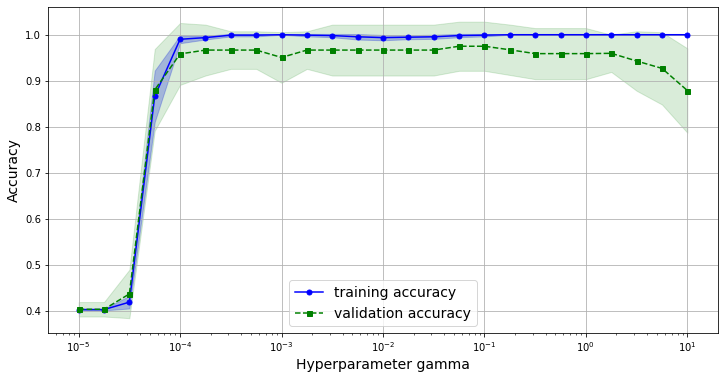

In [9]:
trn_mean = np.mean(train_scores, axis=1)
trn_std  = np.std (train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std  = np.std (val_scores, axis=1)

plt.figure(figsize=(12,6))

plt.plot(param_range, trn_mean, 'bo-',  markersize=5, label='training accuracy')
plt.fill_between(param_range, trn_mean+trn_std, trn_mean-trn_std, alpha=0.25, color='blue')

plt.plot(param_range, val_mean, 'gs--', markersize=5, label='validation accuracy')
plt.fill_between(param_range, val_mean+val_std, val_mean-val_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')  # use logarithmic scale
plt.legend(loc='lower center', fontsize=14)
plt.xlabel('Hyperparameter gamma', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
#plt.savefig('val_curve_wine')  # save the picture as a file
plt.show()

## <font color="#0000E0"> Model Selection, Retrain, and Final Test </font>

<div class="alert alert-block alert-info"><font color="#000000">
We can certainly refine the validation curve by using more values of gamma (please try as an exercise), but let's suppose we decide to use the SVM model with hyperparameter gamma = 0.1.  
    
Up until this point, the model was trained using 90% of training data, because we need the validation set to help with tuning gamma.  Now that gamma is tuned, we should <b>retrain</b> this SVM using the <b>entire training set</b>.  After that, we will finally use our <b>test set (which has never been seen by the model)</b> to get an unbiased estimate for the model generalization performance.
</font></div>

In [10]:
# Model selection: Set the chosen hyperparameter values
pipe.set_params(svc__gamma = 0.1)

# Retrain
pipe.fit( X_train, y_train )

# Final Test
print('Final training accuracy:', pipe.score(X_train, y_train))
print('Final test accuracy:',     pipe.score(X_test, y_test))

Final training accuracy: 1.0
Final test accuracy: 1.0


## Appendix: Compare codes with and without pipeline

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200)

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline, Pipeline

winedf = pd.read_csv("wine.csv")

# Define Predictors and Target Variable
X = winedf.iloc[:, 1:]
y = winedf.loc[:, 'Class label']

# Splitting Data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=8)

### Without pipeline

In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)

lda = LDA(n_components=2)
lda.fit(X_train_std, y_train)
X_train_reduced = lda.transform(X_train_std)

lr = LogisticRegression(C=1, solver='liblinear', multi_class='ovr')
lr.fit(X_train_reduced, y_train)

X_test_std  = sc.transform(X_test)
X_test_reduced  = lda.transform(X_test_std)

print("predicted class:", lr.predict(X_test_reduced))
print("actual class:   ", np.array(y_test))
print("test accuracy:  ", lr.score(X_test_reduced, y_test))
print("\nmodel parameters: ", lr.intercept_, '\n', lr.coef_)

predicted class: [1 1 2 1 3 3 2 2 1 2 3 3 2 1 2 2 3 2 2 1 1 3 2 2 1 2 1 1 1 2 3 3 2 2 3 3 2 2 3 1 3 1 2 1 1 1 2 1 3 1 1 3 3 2]
actual class:    [1 1 2 1 3 3 2 2 2 2 3 3 2 1 2 2 3 2 2 1 1 3 2 2 1 2 1 1 1 2 3 3 2 2 3 3 2 2 3 1 3 1 2 1 1 1 2 1 3 1 1 3 3 2]
test accuracy:   0.9814814814814815

model parameters:  [-1.23800589 -0.97665768 -2.05298517] 
 [[ 1.5593705   1.49726536]
 [-0.20018916 -2.73326551]
 [-1.17122691  1.33975142]]


### With pipeline

In [13]:
pipe = make_pipeline(StandardScaler(),
                     LDA(n_components=2),
                     LogisticRegression(C=1, solver='liblinear', multi_class='ovr'))
pipe.fit(X_train, y_train)
print("predicted class:", pipe.predict(X_test))
print("actual class:   ", np.array(y_test))
print("test accuracy:  ", pipe.score(X_test, y_test))

lr = pipe.named_steps.logisticregression
print("\nmodel parameters: ", lr.intercept_, '\n', lr.coef_)

predicted class: [1 1 2 1 3 3 2 2 1 2 3 3 2 1 2 2 3 2 2 1 1 3 2 2 1 2 1 1 1 2 3 3 2 2 3 3 2 2 3 1 3 1 2 1 1 1 2 1 3 1 1 3 3 2]
actual class:    [1 1 2 1 3 3 2 2 2 2 3 3 2 1 2 2 3 2 2 1 1 3 2 2 1 2 1 1 1 2 3 3 2 2 3 3 2 2 3 1 3 1 2 1 1 1 2 1 3 1 1 3 3 2]
test accuracy:   0.9814814814814815

model parameters:  [-1.23800589 -0.97665768 -2.05298517] 
 [[ 1.5593705   1.49726536]
 [-0.20018916 -2.73326551]
 [-1.17122691  1.33975142]]


### Alternative pipeline constructor

In [14]:
pipe = Pipeline([
    ('sc', StandardScaler()), 
    ('lda', LDA(n_components=2)),
    ('lr', LogisticRegression(C=1, solver='liblinear', multi_class='ovr'))
])
pipe.fit(X_train, y_train)
print("predicted class:", pipe.predict(X_test))
print("actual class:   ", np.array(y_test))
print("test accuracy:  ", pipe.score(X_test, y_test))

lr = pipe.named_steps.lr
print("\nmodel parameters: ", lr.intercept_, '\n', lr.coef_)

predicted class: [1 1 2 1 3 3 2 2 1 2 3 3 2 1 2 2 3 2 2 1 1 3 2 2 1 2 1 1 1 2 3 3 2 2 3 3 2 2 3 1 3 1 2 1 1 1 2 1 3 1 1 3 3 2]
actual class:    [1 1 2 1 3 3 2 2 2 2 3 3 2 1 2 2 3 2 2 1 1 3 2 2 1 2 1 1 1 2 3 3 2 2 3 3 2 2 3 1 3 1 2 1 1 1 2 1 3 1 1 3 3 2]
test accuracy:   0.9814814814814815

model parameters:  [-1.23800589 -0.97665768 -2.05298517] 
 [[ 1.5593705   1.49726536]
 [-0.20018916 -2.73326551]
 [-1.17122691  1.33975142]]
